In [176]:
import numpy as np 
import pandas as pd 

Pracujemy na bazie danych "Diagnosis of COVID-19 and its clinical spectrum", dotyczącej wyników testów na SARS-Cov-2 i towarzyszącym wynikom badań.
Powyżej zaimportowaliśmy bibliotekę numpy służącą do obróbki liczb i macierzy, bibliotekę pandas pomocną przy zbiorach danych, i matplotlib który przyda się potem do tworzenia wykresów.
Poniżej wczytujemy bazę danych. Przykładowy fragment tabeli wygląda następująco:

In [177]:
dataset = pd.read_excel('dataset.xlsx', index_col=0)
dataset.head(10)

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient ID,,,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75f16746216c4d1,9,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2a2245e360808d7,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509197ec73f1400,16,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8bb9d64f0215244,1,negative,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730393,NaN


Dataframe ma 5644 rekordów, opisanych 110 kolumnami.

In [178]:
dataset.shape

(5644, 110)

Aby lepiej przyjrzeć się charakterystyce każdej kolumny, używamy metody describe. Możemy wyczytać wartości średnie, odchylenie standardowe, wartości poszczególnych kwartyli.

In [179]:
dataset.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Patient age quantile,5644,NaN,NaN,NaN,9.31839,5.7779,0,4,9,14,19
SARS-Cov-2 exam result,5644,2,negative,5086,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Patient addmited to regular ward (1=yes, 0=no)",5644,NaN,NaN,NaN,0.0139972,0.117489,0,0,0,0,1
"Patient addmited to semi-intensive unit (1=yes, 0=no)",5644,NaN,NaN,NaN,0.00885897,0.0937125,0,0,0,0,1
"Patient addmited to intensive care unit (1=yes, 0=no)",5644,NaN,NaN,NaN,0.00726435,0.0849286,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
HCO3 (arterial blood gas analysis),27,NaN,NaN,NaN,6.07084e-09,1.01905,-2.98559,-0.539721,0.0563319,0.50851,2.02947
pO2 (arterial blood gas analysis),27,NaN,NaN,NaN,-2.46973e-08,1.01905,-1.17591,-0.81699,-0.159955,0.450009,2.20537
Arteiral Fio2,20,NaN,NaN,NaN,4.65661e-09,1.02598,-1.53293,-0.121498,-0.0117437,-0.0117437,2.84186
Phosphor,20,NaN,NaN,NaN,6.33299e-09,1.02598,-1.48053,-0.55273,-0.138182,0.276365,2.86235


Jak widać, baza danych jest pełna wartości NaN - czyli pustych pól. Możemy wyszukać takie kolumny, dla których ponad 95% wierszy nie posiada rzadnej wartości, i usunąć je. Jest takich kolumn 65.

In [180]:
total_null_values = dataset.isnull().sum().sort_values(ascending=False) 
not_null_values = dataset.notnull().sum().sort_values(ascending=False) 
null_values_percentage = (dataset.isnull().sum()/dataset.notnull().count().sort_values(ascending=False)) * 100
dataset_missing_values = pd.concat({'Null': total_null_values, 'Not Null': not_null_values, 'Percentage': null_values_percentage}, axis=1)
dataset_missing_values[dataset_missing_values['Percentage']>95]

,Null,Not Null,Percentage
"Prothrombin time (PT), Activity",5644,0,100.000000
D-Dimer,5644,0,100.000000
Mycoplasma pneumoniae,5644,0,100.000000
Urine - Sugar,5644,0,100.000000
Partial thromboplastin time (PTT),5644,0,100.000000
...,...,...,...
Direct Bilirubin,5462,182,96.775337
Total Bilirubin,5462,182,96.775337
Serum Glucose,5436,208,96.314670
Alanine transaminase,5419,225,96.013466


Usuwamy kolumny w których mniej niż 5% wierszy ma dane.

In [181]:
nieznaczace_kolumny = [row for row in dataset_missing_values[dataset_missing_values['Percentage']>=90].index]
dataset.drop(columns=nieznaczace_kolumny, inplace=True)
dataset.shape

(5644, 38)

Pozostałe wartości NaN zastępujemy zerami. Aby uniknąć nieprzypadkowości w uporządkowaniu tabeli, która zaburzałaby podział na zestaw uczący i zestaw testowy, 'tasujemy' rekordy w tabeli metodą .sample.
Następnie zastępujemy wartości opisowe wartościami booleańskimi, tam gdzie to możliwe.

In [182]:
# zastępujemy NaN zerem
dataset = dataset.fillna(0)

# 'tasujemy' wiersze w tabeli
dataset = dataset.sample(frac=1).reset_index(drop=True)

# zamieniamy wartości opisowe na booleanskie
dataset.replace('not_detected', 0, inplace=True)
dataset.replace('detected', 0, inplace=True)
dataset.replace('absent', 0, inplace=True)
dataset.replace('present', 1, inplace=True)
dataset.replace('negative', 0, inplace=True)
dataset.replace('positive', 1, inplace=True)

# rozmiar tabeli po oczyszczeniu
dataset.head(10)

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,2,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0
1,9,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,14,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
5,15,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
6,4,1,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
7,4,0,0,0,0,0.877395,0.980156,-0.014941,1.805767,0.842479,...,0,0,0,0,0,0,0,0,0,0
8,9,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
9,14,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [183]:
# podział na target, features, dane uczące i dane testowe
from sklearn.model_selection import train_test_split
target = dataset['SARS-Cov-2 exam result']
features = dataset.select_dtypes(exclude=[object])
X_train,X_test,y_train,y_test = train_test_split(features, target, test_size=0.3, random_state=42, stratify = target)

print("Number of samples in train set: %d" % y_train.shape)
print("Number of positive samples in train set: %d" % (y_train == 1).sum(axis=0))
print("Number of negative samples in train set: %d" % (y_train == 0).sum(axis=0))
print()
print("Number of samples in test set: %d" % y_test.shape)
print("Number of positive samples in test set: %d" % (y_test == 1).sum(axis=0))
print("Number of negative samples in test set: %d" % (y_test == 0).sum(axis=0))


Number of samples in train set: 3950
Number of positive samples in train set: 391
Number of negative samples in train set: 3559

Number of samples in test set: 1694
Number of positive samples in test set: 167
Number of negative samples in test set: 1527


In [184]:
# K-najbliższych sąsiadów

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# szukamy najlepszej liczby sąsiadów
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors' : np.arange(1,20)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [185]:
# najlepsza liczba sąsiadów
print("The best paramter we have is: {}" .format(knn_cv.best_params_))

# najlepszy wynik (dla tego parametru)
print("The best score we have achieved is: {}" .format(knn_cv.best_score_))

The best paramter we have is: {'n_neighbors': 7}
The best score we have achieved is: 0.9949367088607595


In [186]:
# przewidywanie targetu dla danych testowych
y_pred = knn_cv.predict(X_test)

In [187]:
# dokładność
print("The score accuracy for training data is: {}" .format(knn_cv.score(X_train,y_train)))
print("The score accuracy for testing data is: {}" .format(knn_cv.score(X_test,y_test)))

The score accuracy for training data is: 0.9959493670886076
The score accuracy for testing data is: 0.9958677685950413


In [188]:
# for performance metrics
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1527
           1       0.99      0.97      0.98       167

    accuracy                           1.00      1694
   macro avg       0.99      0.98      0.99      1694
weighted avg       1.00      1.00      1.00      1694

[[1525    2]
 [   5  162]]


Skuteczność końcowa: regresja logistyczna99.97%
Skuteczność końcowa: jadro SVM100.00%
Skuteczność końcowa: k-najblizsi99.37%


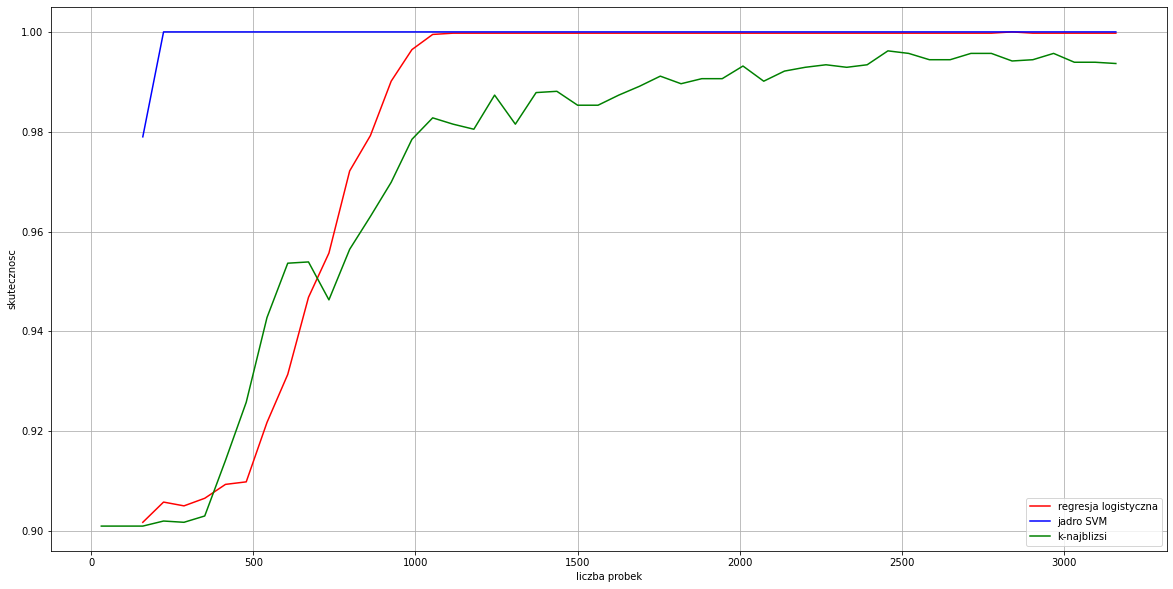

In [189]:
from sklearn import datasets, svm
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

def zrob(X,y):
    regresja_log = LogisticRegression(C=0.1)
    regresja_log.fit(X, y)

    jadro_svm = svm.SVC(kernel='linear', C=0.1)
    jadro_svm.fit(X, y)

    k_naj = neighbors.KNeighborsClassifier(9, weights="uniform")
    k_naj.fit(X, y)

    
    metody = [(regresja_log, "r", "regresja logistyczna", 0), (jadro_svm, "b", "jadro SVM", 1), (k_naj, "g", "k-najblizsi", 2)]

    plt.figure(figsize= (20,10))
    plt.grid()
    plt.ylabel("skutecznosc")
    plt.xlabel("liczba probek")
    for metoda, kolor, nazwa, i in metody:
        train_sizes, train_scores, test_scores = learning_curve(metoda, X, y, n_jobs=-1, cv=None, train_sizes=np.linspace(0.01, 1, ), verbose=0)
        test_scores_mean = np.mean(test_scores, axis=1)
        print("Skuteczność końcowa: " + nazwa + "{:.2f}".format(test_scores_mean[-1]*100) + "%")
        plt.plot(train_sizes, test_scores_mean, color=kolor, label=nazwa)
    plt.legend()
    plt.show()

zrob(X_train, y_train)